In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report


In [2]:
np.random.seed(42)

In [4]:
import ssl
import urllib.request

ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

urllib.request.install_opener(urllib.request.build_opener(urllib.request.HTTPSHandler(context=ssl_context)))

from sklearn.datasets import fetch_olivetti_faces
import numpy as np

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data
y = faces.target
images = faces.images

print("Data shape:", X.shape, "Images shape:", images.shape, "Num classes:", len(np.unique(y)))

Data shape: (400, 4096) Images shape: (400, 64, 64) Num classes: 40


In [5]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [6]:

pca_full = PCA()
pca_full.fit(X_scaled)
explained_ratio = pca_full.explained_variance_ratio_
cumulative = np.cumsum(explained_ratio)

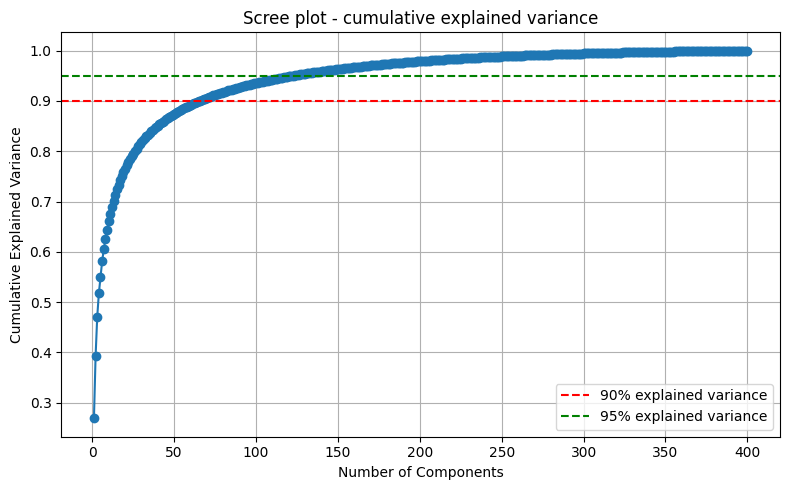

In [7]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(cumulative)+1), cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree plot - cumulative explained variance')
plt.grid(True)
plt.axhline(0.90, color='red', linestyle='--', label='90% explained variance')
plt.axhline(0.95, color='green', linestyle='--', label='95% explained variance')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
n_components_95 = int(np.searchsorted(cumulative, 0.95) + 1)
print("Components for 95% variance:", n_components_95)

Components for 95% variance: 123


In [9]:
n_components = n_components_95   
pca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("X_pca shape:", X_pca.shape)


X_pca shape: (400, 123)


In [10]:
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_scaled)

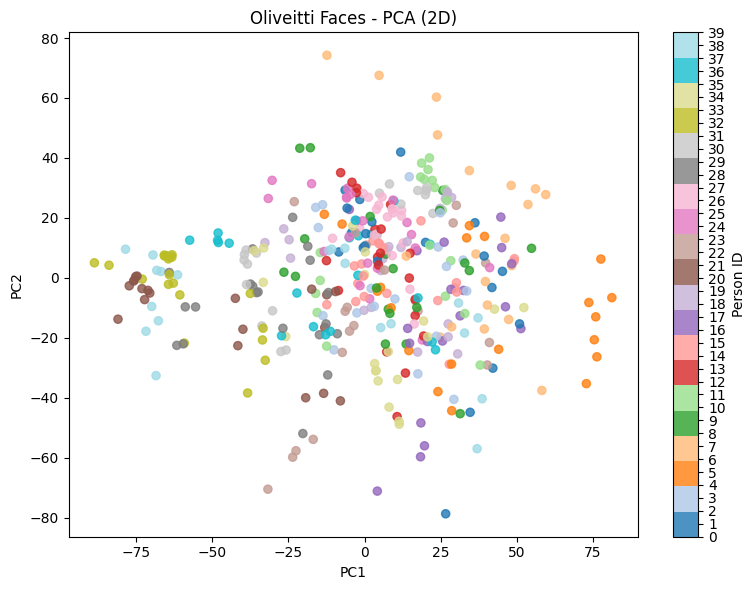

In [11]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='tab20', s=35, alpha=0.8)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('Oliveitti Faces - PCA (2D)')
plt.colorbar(label='Person ID', ticks=range(0,40))
plt.tight_layout()
plt.show()


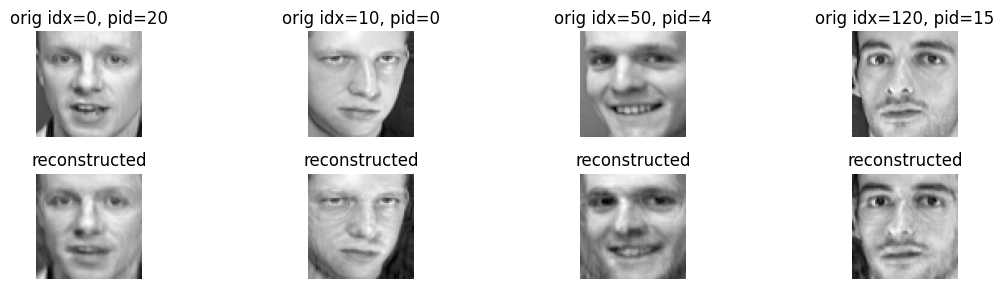

In [12]:

X_reconstructed_scaled = pca.inverse_transform(X_pca)          
X_reconstructed = scaler.inverse_transform(X_reconstructed_scaled)  

def show_original_and_recon(indices, ncols=4):
    n = len(indices)
    plt.figure(figsize=(3*ncols, 3*int(np.ceil(n/ncols))))
    for i, idx in enumerate(indices):
        # original
        plt.subplot(2, ncols, i+1)
        plt.imshow(X[idx].reshape(64,64), cmap='gray')
        plt.title(f"orig idx={idx}, pid={y[idx]}")
        plt.axis('off')
        # reconstruction
        plt.subplot(2, ncols, ncols + i + 1)
        plt.imshow(X_reconstructed[idx].reshape(64,64), cmap='gray')
        plt.title("reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_original_and_recon([0, 10, 50, 120], ncols=4)


In [13]:

mse = mean_squared_error(X, X_reconstructed)
print("Reconstruction MSE (all images):", mse)

Reconstruction MSE (all images): 0.000985260703600943


In [14]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler_clf = StandardScaler()
X_train_scaled_clf = scaler_clf.fit_transform(X_train_raw)
X_test_scaled_clf  = scaler_clf.transform(X_test_raw)

clf_raw = SVC(kernel='linear', C=1.0, random_state=42)
clf_raw.fit(X_train_scaled_clf, y_train)
y_pred_raw = clf_raw.predict(X_test_scaled_clf)
acc_raw = accuracy_score(y_test, y_pred_raw)
print("SVM accuracy on original pixels:", acc_raw)

pca_for_clf = PCA(n_components=100, random_state=42)   
X_train_pca = pca_for_clf.fit_transform(X_train_scaled_clf)
X_test_pca  = pca_for_clf.transform(X_test_scaled_clf)

clf_pca = SVC(kernel='linear', C=1.0, random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print("SVM accuracy on PCA-reduced (100 comps):", acc_pca)

print("\nClassification report (PCA-reduced):")
print(classification_report(y_test, y_pred_pca, zero_division=0))

SVM accuracy on original pixels: 0.9625
SVM accuracy on PCA-reduced (100 comps): 0.9625

Classification report (PCA-reduced):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         2
         